In [16]:
import os
import torch
from torch import nn
import torch.nn.functional as F
import matplotlib.pyplot as plt
import torchvision.transforms as T
from torch.utils.data import DataLoader

from apn import APN
from data.cub import CUBDataset

In [2]:
test_transforms = T.Compose([
    T.Resize(size=448),
    T.CenterCrop(size=448),
    T.ToTensor()
])

dataset_val = CUBDataset(os.path.join('datasets', 'CUB'), split='val', transforms=test_transforms)
dataloader_val = DataLoader(dataset=dataset_val, batch_size=4, shuffle=True, num_workers=8)
dataloader_val_iter = iter(dataloader_val)

In [9]:
backbone_weights = torch.load('checkpoints/resnet101_ft_CUB.pt', map_location='cpu')
apn_net = APN(num_classes=200,
              num_attrs=107,
              backbone_name='resnet101',
              backbone_weights=backbone_weights,
              dist='dot')
full_weghts = torch.load('checkpoints/apn_CUB.pt', map_location='cpu')
apn_net.load_state_dict(full_weghts)

<All keys matched successfully>

In [11]:
apn_net.eval()
with torch.no_grad():
    batch_dict = next(dataloader_val_iter)
    outputs = apn_net(batch_dict)

In [12]:
list(outputs.keys())

['class_scores', 'attr_scores', 'attn_maps']

In [17]:
max_attn_values = F.max_pool2d(outputs['attn_maps'], kernel_size=(14, 14))

In [23]:
top_attn_values = torch.topk(max_attn_values.squeeze(), k=5, dim=-1)

torch.return_types.topk(
values=tensor([[7.3823, 3.7020, 3.6528, 3.3625, 3.3621],
        [4.8748, 4.3526, 4.2768, 4.2661, 4.1050],
        [5.1868, 4.5832, 3.6802, 3.1026, 3.0856],
        [5.0600, 4.5534, 4.3693, 4.1363, 3.8571]]),
indices=tensor([[10, 17, 88, 31, 55],
        [17, 85, 83, 24, 56],
        [57, 43, 22, 40, 38],
        [56, 55, 94,  1, 45]]))

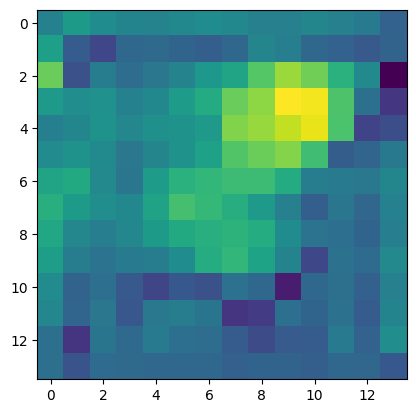

In [29]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(outputs['attn_maps'][0, 10, ...].numpy())


In [52]:
torch.max(outputs['attn_maps'][0, 10, ...])

tensor(7.3823)

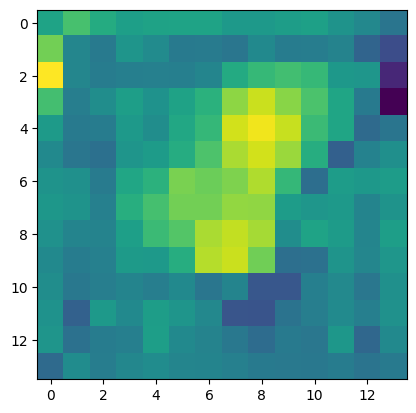

In [48]:
plt.imshow(outputs['attn_maps'][0, 0, ...].numpy())

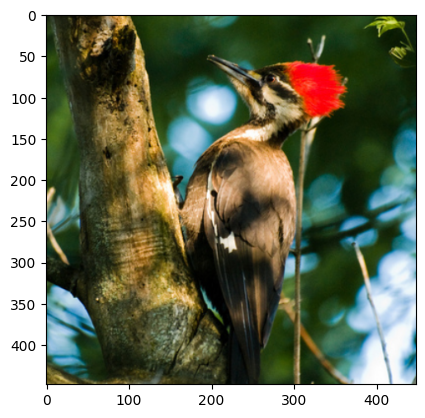

In [34]:
plt.imshow(batch_dict['pixel_values'][0].permute(1,2,0).numpy())

In [55]:
max_attn_values.squeeze()[0]

tensor([-5.3181e-01, -7.8007e-01,  6.0573e-02, -9.6227e-01,  4.5038e-01,
         3.2733e+00, -5.7308e-01,  9.3890e-01, -5.1067e-01,  1.6440e-01,
         7.3823e+00, -1.9992e-01,  2.3975e-01,  1.7197e+00, -7.1519e-01,
        -3.8692e-01,  2.8913e+00,  3.7020e+00, -5.8156e-02, -2.4618e-01,
        -1.6050e+00, -5.3657e-01, -6.2489e-01, -1.5187e-01, -3.8009e-01,
        -1.7804e-01, -8.8417e-01, -1.0654e+00,  1.3295e+00,  5.5723e-02,
         3.3139e-01,  3.3625e+00, -7.0245e-01, -5.9007e-01, -3.5462e-01,
        -9.2856e-01, -3.1563e-01, -1.0594e-01, -4.1944e-01,  4.6716e-01,
         6.8275e-01,  6.1715e-02, -1.1670e-01,  2.4806e+00, -2.4998e-01,
        -3.4648e-01,  6.8693e-01, -7.9815e-01, -3.9387e-01, -3.6931e-03,
         5.0656e-01,  3.1823e-01,  1.4867e+00, -1.2408e-01, -1.6601e-01,
         3.3621e+00, -4.5283e-01, -7.9647e-01, -1.0435e-01, -2.1385e-01,
        -1.2618e-01,  8.1664e-01, -6.9600e-01, -7.2852e-01, -7.5328e-01,
        -2.5206e-01, -1.2907e+00, -1.3863e+00, -4.0

In [57]:
dataset_val.attr_class_map[188]

tensor([0.7055, 0.0061, 0.2515, 0.0000, 0.0171, 0.0629, 0.0000, 0.9657, 0.9886,
        0.0000, 0.0186, 0.0559, 0.0000, 0.9627, 0.9503, 0.0000, 0.0000, 0.2083,
        0.0139, 0.0208, 0.7639, 0.3056, 0.8803, 0.0141, 0.1056, 0.0207, 0.0414,
        0.0000, 0.9517, 0.9448, 0.0000, 0.3875, 0.0594, 0.0396, 0.7426, 0.9109,
        0.0000, 0.0921, 0.1184, 0.0000, 0.2128, 0.0355, 0.0000, 0.7518, 0.2411,
        0.1250, 0.0197, 0.0000, 0.7171, 0.1842, 0.7962, 0.9259, 0.0679, 0.0182,
        0.0000, 0.0667, 0.0000, 0.0000, 0.2242, 0.0286, 0.0476, 0.9810, 0.8286,
        0.0000, 0.0000, 0.0970, 0.0000, 0.0000, 0.4000, 0.1212, 0.0000, 0.1799,
        0.0144, 0.0000, 0.7698, 0.2878, 0.2581, 0.7258, 0.0000, 0.6892, 0.0405,
        0.0619, 0.4336, 0.3009, 0.8116, 0.0122, 0.1159, 0.0000, 0.7866, 0.8049,
        0.1220, 0.6391, 0.2481, 0.0301, 0.1333, 0.8848, 0.0121, 0.0178, 0.0000,
        0.1657, 0.0000, 0.0000, 0.0473, 0.0000, 0.2733, 0.6708, 0.0559])

In [46]:
dataset_val.main_df.iloc[11065]['file_path']

'188.Pileated_Woodpecker/Pileated_Woodpecker_0041_180461.jpg'

In [47]:
dataset_val.attribute_df

,attribute_name,part_name,part_id
1,has_bill_shape::dagger,head,0
4,has_bill_shape::hooked_seabird,head,0
6,has_bill_shape::all-purpose,head,0
7,has_bill_shape::cone,head,0
10,has_wing_color::brown,wing,6
...,...,...,...
305,has_crown_color::white,head,0
308,has_wing_pattern::solid,wing,6
309,has_wing_pattern::spotted,wing,6
310,has_wing_pattern::striped,wing,6


In [44]:
torch.topk(dataset_val.attr_class_map[187], k=5)

torch.return_types.topk(
values=tensor([0.9870, 0.9699, 0.9675, 0.9633, 0.9545]),
indices=tensor([78, 34, 28, 73, 81]))

In [42]:
batch_dict['class_ids']

tensor([187,  88, 140,  52])

In [32]:
batch_dict['image_ids']

tensor([11065,  5188,  8252,  3010])

In [26]:
batch_dict['pixel_values']

tensor([[[[0.0706, 0.0784, 0.0824,  ..., 0.0824, 0.0745, 0.0706],
          [0.0863, 0.0784, 0.0863,  ..., 0.0863, 0.0784, 0.0745],
          [0.0941, 0.0824, 0.0941,  ..., 0.0863, 0.0824, 0.0745],
          ...,
          [0.5059, 0.4549, 0.4353,  ..., 0.4039, 0.4353, 0.4314],
          [0.5059, 0.4706, 0.4745,  ..., 0.4235, 0.4471, 0.4471],
          [0.4471, 0.4510, 0.5098,  ..., 0.4549, 0.4588, 0.4706]],

         [[0.1255, 0.1333, 0.1333,  ..., 0.1765, 0.1725, 0.1686],
          [0.1451, 0.1373, 0.1373,  ..., 0.1725, 0.1725, 0.1647],
          [0.1529, 0.1373, 0.1451,  ..., 0.1608, 0.1608, 0.1569],
          ...,
          [0.4392, 0.3882, 0.3725,  ..., 0.4667, 0.4824, 0.4706],
          [0.4510, 0.4157, 0.4157,  ..., 0.4667, 0.4824, 0.4824],
          [0.4078, 0.4118, 0.4627,  ..., 0.4824, 0.4863, 0.4980]],

         [[0.0549, 0.0627, 0.0627,  ..., 0.0627, 0.0588, 0.0549],
          [0.0706, 0.0588, 0.0627,  ..., 0.0667, 0.0627, 0.0549],
          [0.0784, 0.0588, 0.0667,  ..., 0

In [27]:
normalize = T.Normalize(mean=[0.485, 0.456, 0.406],
                                     std=[0.229, 0.224, 0.225])
normalize(batch_dict['pixel_values'])

tensor([[[[-1.8097, -1.7754, -1.7583,  ..., -1.7583, -1.7925, -1.8097],
          [-1.7412, -1.7754, -1.7412,  ..., -1.7412, -1.7754, -1.7925],
          [-1.7069, -1.7583, -1.7069,  ..., -1.7412, -1.7583, -1.7925],
          ...,
          [ 0.0912, -0.1314, -0.2171,  ..., -0.3541, -0.2171, -0.2342],
          [ 0.0912, -0.0629, -0.0458,  ..., -0.2684, -0.1657, -0.1657],
          [-0.1657, -0.1486,  0.1083,  ..., -0.1314, -0.1143, -0.0629]],

         [[-1.4755, -1.4405, -1.4405,  ..., -1.2479, -1.2654, -1.2829],
          [-1.3880, -1.4230, -1.4230,  ..., -1.2654, -1.2654, -1.3004],
          [-1.3529, -1.4230, -1.3880,  ..., -1.3179, -1.3179, -1.3354],
          ...,
          [-0.0749, -0.3025, -0.3725,  ...,  0.0476,  0.1176,  0.0651],
          [-0.0224, -0.1800, -0.1800,  ...,  0.0476,  0.1176,  0.1176],
          [-0.2150, -0.1975,  0.0301,  ...,  0.1176,  0.1352,  0.1877]],

         [[-1.5604, -1.5256, -1.5256,  ..., -1.5256, -1.5430, -1.5604],
          [-1.4907, -1.5430, -